In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Let's connect Bybit to get pandas csvs

In [5]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
import pandas as pd
import numpy as np

In [5]:
from pybit.unified_trading import HTTP
session = HTTP(testnet=True)
print(session.get_server_time())

{'retCode': 0, 'retMsg': 'OK', 'result': {'timeSecond': '1715311491', 'timeNano': '1715311491339644674'}, 'retExtInfo': {}, 'time': 1715311491339}


You can look up the data and ways to load them at https://bybit-exchange.github.io/docs/v5/market

In [6]:
import datetime

def convert_to_timestamp(date_time_str):
    # List of expected date and time formats, from most specific to least specific
    formats = [
        '%Y-%m-%d %H:%M:%S',  # Complete date and time
        '%Y-%m-%d %H:%M',     # Date and time without seconds
        '%Y-%m-%d %H',        # Date and hour only
        '%Y-%m-%d'            # Date only
    ]
    
    # Try parsing the date_time string using the expected formats
    for fmt in formats:
        try:
            date_time_obj = datetime.datetime.strptime(date_time_str, fmt)
            # Convert datetime object to timestamp (in seconds)
            timestamp = int(date_time_obj.timestamp())
            # Convert to milliseconds and ensure it is a 13-digit number
            timestamp_milliseconds = timestamp * 1000
            return '{:013d}'.format(timestamp_milliseconds)
        except ValueError:
            continue
    
    # Raise an error if no format matches
    raise ValueError("Date and time format is incorrect or unsupported.")

# Input from user
input_date_time = "2024-01-1"

# Get timestamp
try:
    result_timestamp = convert_to_timestamp(input_date_time)
    print("The Unix timestamp is:", result_timestamp)
except ValueError as e:
    print(e)



The Unix timestamp is: 1704034800000


## 1) I take index data since they are smoother (using get_kline I can get insane high and close prices).

In [10]:
start_date = convert_to_timestamp("2024-01-01")
end_date = convert_to_timestamp("2024-5-1")

In [11]:
from pybit.unified_trading import HTTP
session = HTTP(testnet=True)

symbol = "BTCUSD"
category = "linear"

print(session.get_index_price_kline(
    category=category,
    symbol=symbol,
    interval="D",
    start = start_date,
    end = end_date,
    limit=200,
))

data = session.get_index_price_kline(
    category=category,
    symbol=symbol,
    interval="D",
    start = start_date,
    end = end_date,
    limit=200,
)


# Convert list to DataFrame
columns = ['startTime', 'openPrice', 'highPrice', 'lowPrice', 'closePrice']#, 'volume', 'turnover']
df = pd.DataFrame(data["result"]['list'], columns=columns)

# Adding a new column for the symbol
df['symbol'] = symbol

# Convert startTime to datetime and prices to floats
df['startTime'] = pd.to_datetime(df['startTime'].astype(float), unit='ms')
for col in ['openPrice', 'highPrice', 'lowPrice', 'closePrice']:
    df[col] = df[col].astype(float)

# Sort the DataFrame by startTime in descending order
df = df.sort_values(by='startTime', ascending=False)

# Display the DataFrame
print(df)

{'retCode': 0, 'retMsg': 'OK', 'result': {'symbol': 'BTCUSD', 'category': 'linear', 'list': [['1714435200000', '63846.04', '64724.78', '59089.54', '60632.64'], ['1714348800000', '63109.42', '64191.68', '61771.95', '63846.04'], ['1714262400000', '63433.42', '64340.59', '62767.71', '63109.42'], ['1714176000000', '63751.61', '63907.37', '62397.63', '63433.42'], ['1714089600000', '64488.03', '64791.93', '63308.59', '63751.61'], ['1714003200000', '64264.16', '65283.51', '62762.54', '64488.03'], ['1713916800000', '66417.21', '67067.61', '63552.64', '64264.16'], ['1713830400000', '66853.85', '67212.23', '65837.95', '66417.21'], ['1713744000000', '64957.8', '67257.89', '64533.45', '66853.85'], ['1713657600000', '64979.7', '65724.52', '64264.41', '64957.8'], ['1713571200000', '63846.96', '65449.63', '63134.18', '64979.7'], ['1713484800000', '63512.79', '65491.83', '59604.03', '63846.96'], ['1713398400000', '61284.88', '64185.06', '60834.44', '63512.79'], ['1713312000000', '63820.71', '64505.44'

## 2) get volume and turnover from Bybit

In [13]:
from pybit.unified_trading import HTTP
session = HTTP(testnet=True)

symbol = "BTCUSD"
category = "linear"

print(session.get_kline(
    category=category,
    symbol=symbol,
    interval="D",
    start = start_date,
    end = end_date,
    limit=200,
))

data_volume = session.get_kline(
    category=category,
    symbol=symbol,
    interval="D",
    start = start_date,
    end = end_date,
    limit=200,
)


# Convert list to DataFrame
columns = ['startTime', 'openPrice', 'highPrice', 'lowPrice', 'closePrice', 'volume', 'turnover']
df2 = pd.DataFrame(data_volume["result"]['list'], columns=columns)


# Convert startTime to datetime and prices to floats
df2['startTime'] = pd.to_datetime(df2['startTime'].astype(float), unit='ms')
for col in ['openPrice', 'highPrice', 'lowPrice', 'closePrice']:
    df2[col] = df2[col].astype(float)

# Sort the DataFrame by startTime in descending order
df2 = df2.sort_values(by='startTime', ascending=False)

# Display the DataFrame
print(df2)

{'retCode': 0, 'retMsg': 'OK', 'result': {'symbol': 'BTCUSD', 'category': 'linear', 'list': [['1714435200000', '63822', '145950.5', '21478', '60599.5', '2117478141', '34765.0453097'], ['1714348800000', '63064', '64157', '56909', '63822', '1330431186', '21244.64874958'], ['1714262400000', '63373.5', '64319.5', '62732', '63064', '698842508', '10994.50587845'], ['1714176000000', '63734', '66737.5', '62429.5', '63373.5', '912937699', '14488.39012097'], ['1714089600000', '64462.5', '64749', '63273', '63734', '1148931440', '17931.56202259'], ['1714003200000', '64254.5', '66113.5', '62715.5', '64462.5', '1373068768', '21448.85940876'], ['1713916800000', '66407.5', '69200', '63577.5', '64254.5', '1301693185', '19922.52836325'], ['1713830400000', '66800.5', '67183.5', '65814', '66407.5', '1013109551', '15238.85700669'], ['1713744000000', '64932', '67225', '62911', '66800.5', '1367116653', '20734.40274438'], ['1713657600000', '64946', '65710.5', '64229', '64932', '1088304541', '16760.29113062'],

## 3) Get open interest

In [17]:
from pybit.unified_trading import HTTP
session = HTTP(testnet=True)

symbol = "BTCUSD"
category = "linear"

print(session.get_open_interest(
    category=category,
    symbol=symbol,
    intervalTime="1d",
    startTime = start_date,
    endTime = end_date,
    limit=200,
))

data_OI = session.get_open_interest(
    category=category,
    symbol=symbol,
    intervalTime="1d",
    startTime = start_date,
    endTime = end_date,
    limit=200,
)


# Convert list to DataFrame
columns = ['openInterest', 'timestamp']
df3 = pd.DataFrame(data_OI["result"]['list'], columns=columns)


# Convert startTime to datetime and prices to floats
df3['startTime'] = pd.to_datetime(df3['timestamp'].astype(float), unit='ms')

# Sort the DataFrame by startTime in descending order
df3 = df3.sort_values(by='startTime', ascending=False)

# Display the DataFrame
print(df3)

{'retCode': 0, 'retMsg': 'OK', 'result': {'symbol': 'BTCUSD', 'category': 'linear', 'list': [{'openInterest': '331760650.00000000', 'timestamp': '1714435200000'}, {'openInterest': '317626466.00000000', 'timestamp': '1714348800000'}, {'openInterest': '316996638.00000000', 'timestamp': '1714262400000'}, {'openInterest': '318241311.00000000', 'timestamp': '1714176000000'}, {'openInterest': '319516725.00000000', 'timestamp': '1714089600000'}, {'openInterest': '318733311.00000000', 'timestamp': '1714003200000'}, {'openInterest': '320300591.00000000', 'timestamp': '1713916800000'}, {'openInterest': '320195120.00000000', 'timestamp': '1713830400000'}, {'openInterest': '317776360.00000000', 'timestamp': '1713744000000'}, {'openInterest': '317759746.00000000', 'timestamp': '1713657600000'}, {'openInterest': '317362370.00000000', 'timestamp': '1713571200000'}, {'openInterest': '319144482.00000000', 'timestamp': '1713484800000'}, {'openInterest': '320805056.00000000', 'timestamp': '1713398400000'

## SAVE THE DATASET

In [19]:
# Perform the merge
df_processed_OI = pd.merge(df, df2[['startTime', 'volume', 'turnover']], on='startTime', how='inner')
df_final = pd.merge(df_processed_OI, df3[['startTime', 'openInterest']], on='startTime', how='inner')


In [20]:
df_final.head()

,startTime,openPrice,highPrice,lowPrice,closePrice,symbol,volume,turnover,openInterest
0,2024-04-30,63846.04,64724.78,59089.54,60632.64,BTCUSD,2117478141,34765.0453097,331760650.00000000
1,2024-04-29,63109.42,64191.68,61771.95,63846.04,BTCUSD,1330431186,21244.64874958,317626466.00000000
2,2024-04-28,63433.42,64340.59,62767.71,63109.42,BTCUSD,698842508,10994.50587845,316996638.00000000
3,2024-04-27,63751.61,63907.37,62397.63,63433.42,BTCUSD,912937699,14488.39012097,318241311.00000000
4,2024-04-26,64488.03,64791.93,63308.59,63751.61,BTCUSD,1148931440,17931.56202259,319516725.00000000


In [21]:
len(df_final)

121

In [22]:
df_final.to_csv('/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_data_vol_OI.csv', index=False) 

In [24]:
df_final = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_data_vol_OI.csv")
df_final.head()

,startTime,openPrice,highPrice,lowPrice,closePrice,symbol,volume,turnover,openInterest
0,2024-04-30,63846.04,64724.78,59089.54,60632.64,BTCUSD,2117478141,34765.045310,331760650.0
1,2024-04-29,63109.42,64191.68,61771.95,63846.04,BTCUSD,1330431186,21244.648750,317626466.0
2,2024-04-28,63433.42,64340.59,62767.71,63109.42,BTCUSD,698842508,10994.505878,316996638.0
3,2024-04-27,63751.61,63907.37,62397.63,63433.42,BTCUSD,912937699,14488.390121,318241311.0
4,2024-04-26,64488.03,64791.93,63308.59,63751.61,BTCUSD,1148931440,17931.562023,319516725.0


## Visualize

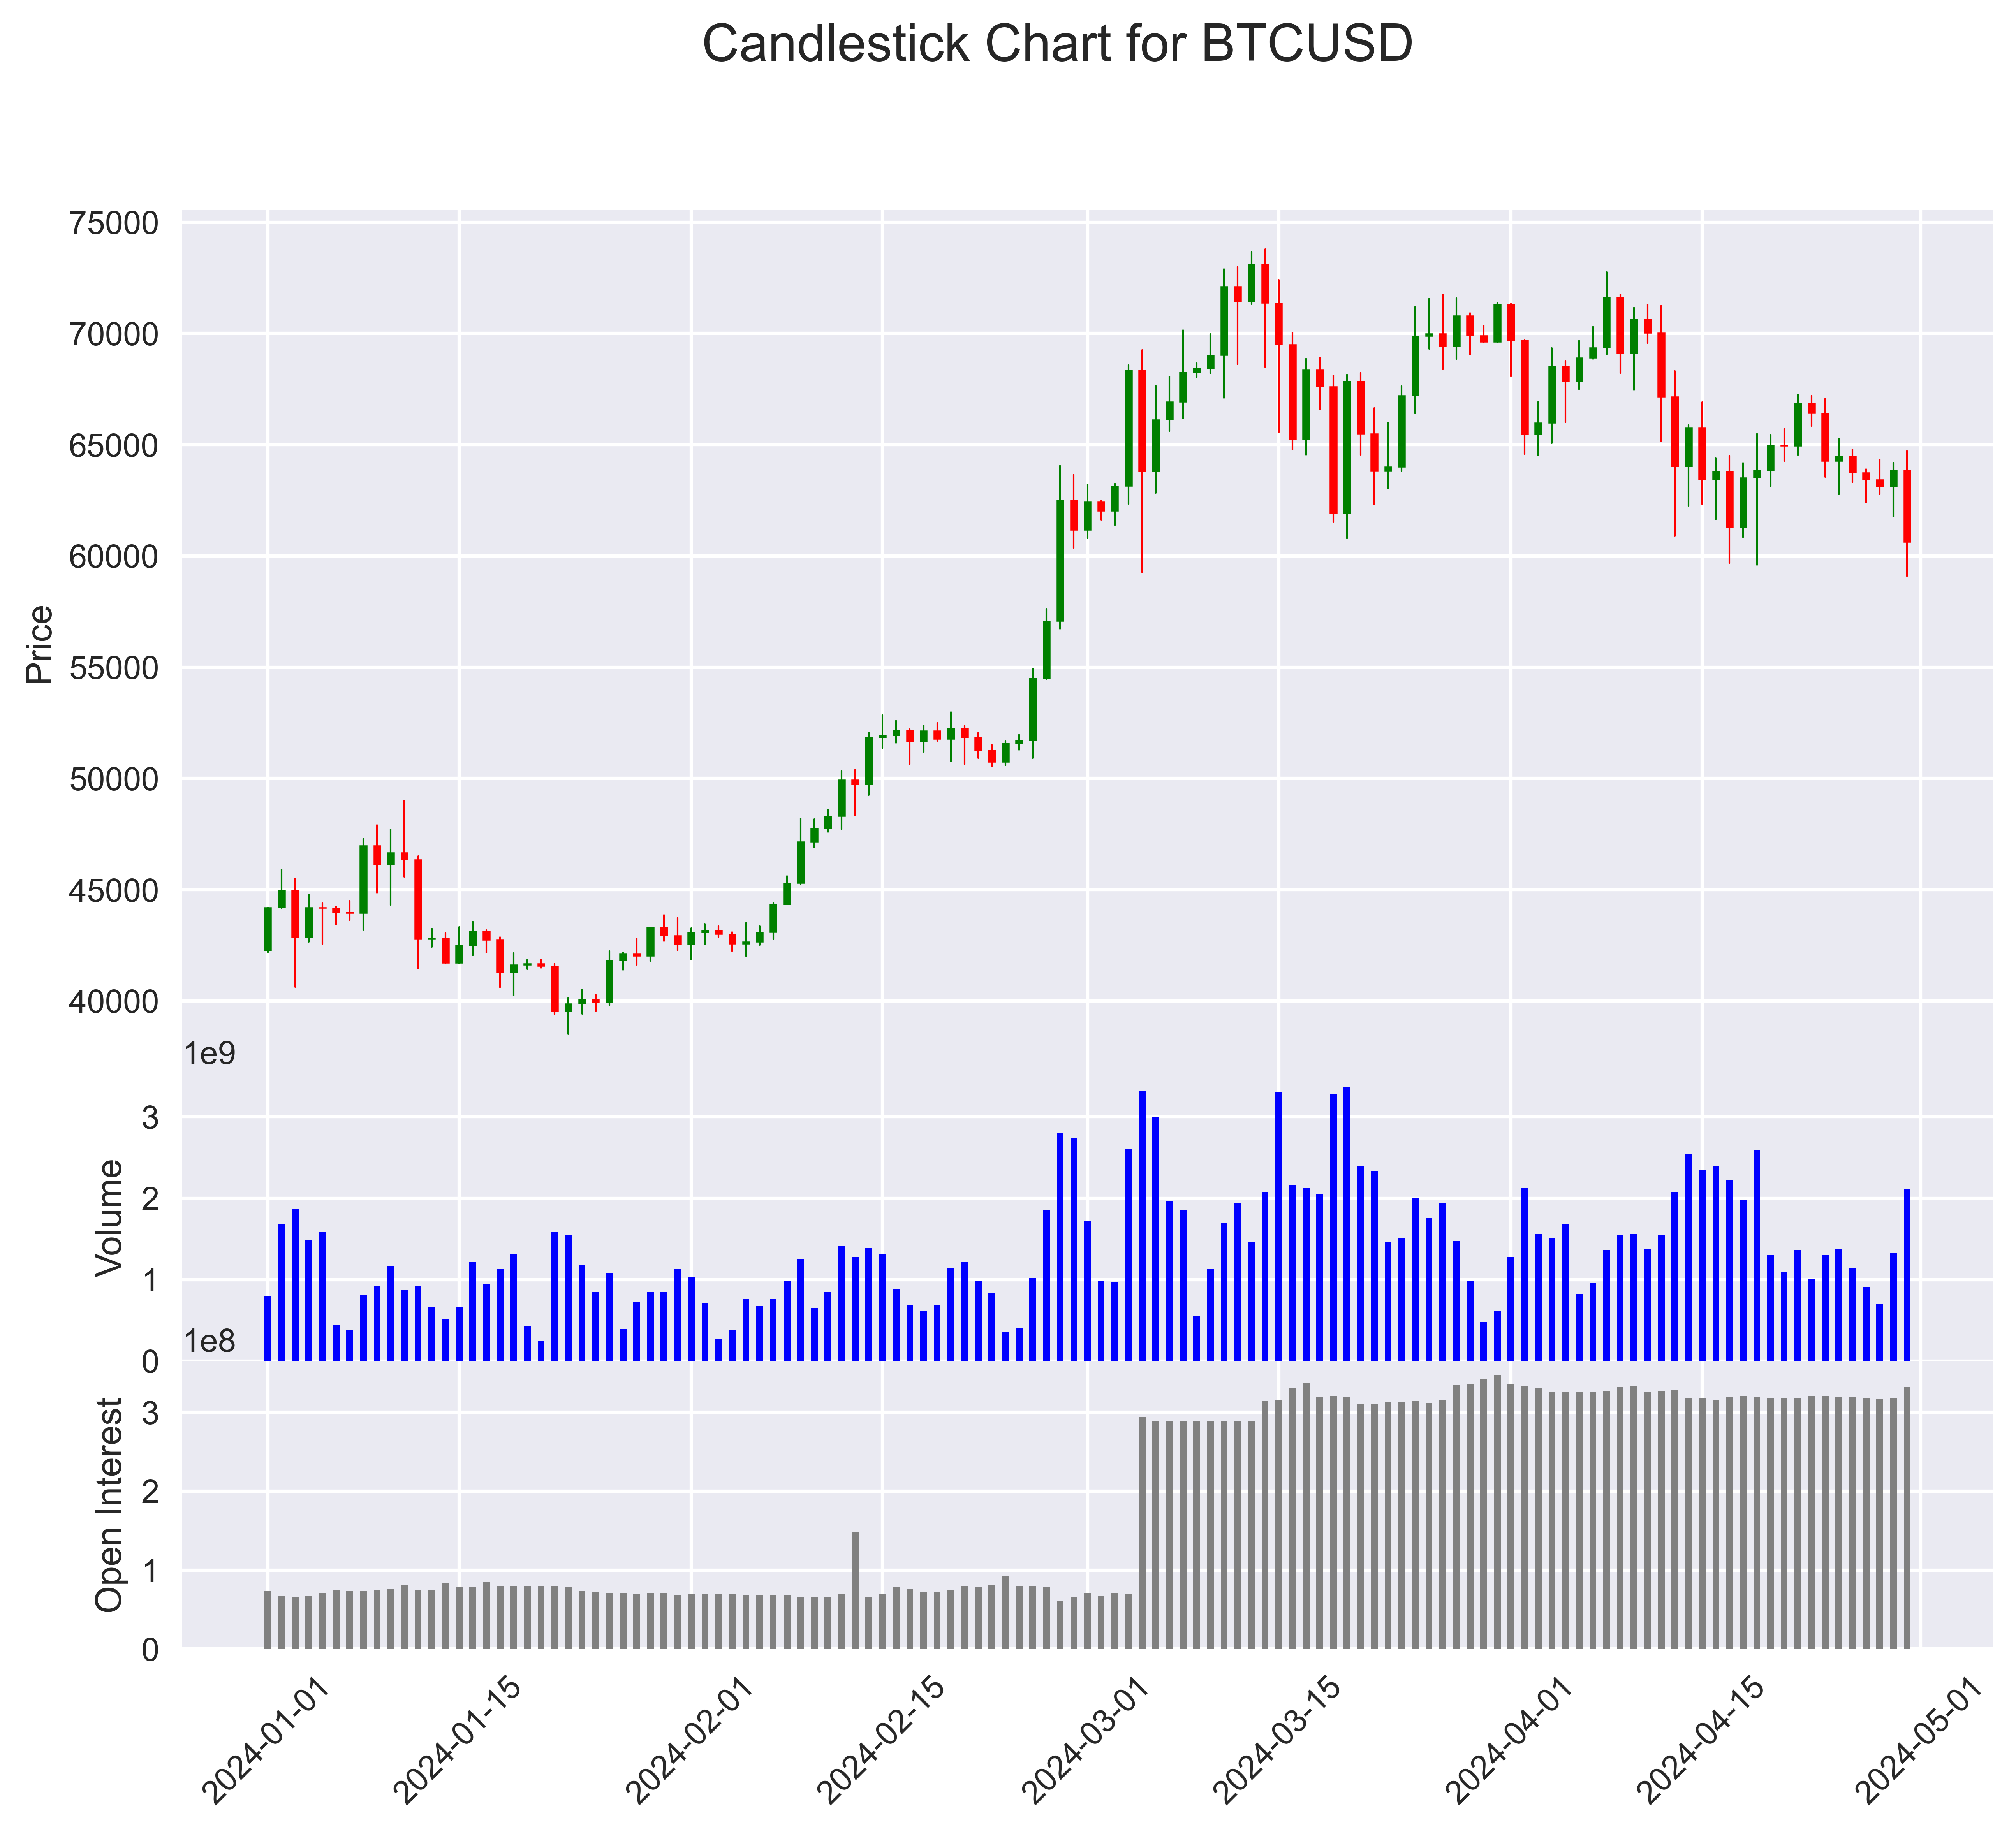

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Prepare data for candlestick chart
df_final['date'] = mdates.date2num(df_final['startTime'])




ohlc = df_final[['date', 'openPrice', 'highPrice', 'lowPrice', 'closePrice']].copy()
volume = df_final[['date', 'volume']].copy()
open_interest = df_final[['date', 'openInterest']].copy()

# Creating subplots with shared x-axis
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

# Plot candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.5, colorup='green', colordown='red', alpha=1)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('Price')

# Plot volume below candlestick chart
ax2.bar(volume['date'], volume['volume'], color='blue', width=0.5)
ax2.set_ylabel('Volume')

# Plot open interest below volume chart
ax3.bar(open_interest['date'], open_interest['openInterest'], color='gray', width=0.5)
ax3.set_ylabel('Open Interest')

# Formatting the shared x-axis
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0)  # Reduce space between plots

# Set the title for the entire figure
fig.suptitle(f"Candlestick Chart for {df_final['symbol'][0]}", fontsize=16)

# Display the plot
plt.show()
